# Flipping Out
### Chart data about coin flips

#### Import All the Things


In [1]:
%matplotlib inline

In [2]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt

#### Coint Toss Function

In [6]:
def coin_toss():
    return random.choice(['heads', 'tails'])

#### Simulations & Tracking at 2<sup>n</sup>

In [10]:
def toss_coin_sim(n=2**16):
    heads = 0
    tails = 0
    count = 0
    toss_results = []
    
    while count <= n:
        result = coin_toss()

        if result == 'heads':
            heads += 1
        else:
            tails += 1
            
        count += 1

        if math.log2(count) % 1 == 0:
            toss_results.append((heads, tails))
            
    return toss_results

#### Function to calculate Difference in HvT

In [9]:
def diff_tosses(list_of_tuples):
    diff = []
    for x, y in list_of_tuples:
        diff.append(abs(x-y))
    return diff

#### Line Plot of Difference between heads and tails at 2<sup>n</sup>

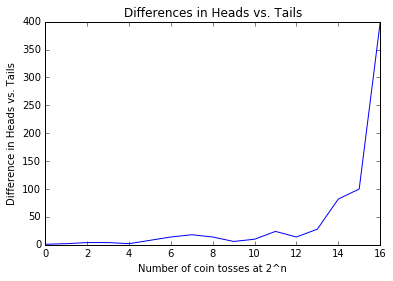

In [12]:
plt.plot(diff_tosses(toss_coin_sim()))
plt.xlabel("Number of coin tosses at 2^n")
plt.ylabel("Difference in Heads vs. Tails")
plt.title("Differences in Heads vs. Tails")
plt.show()


#### Function for finding ratio of heads vs. tails
To guard against division by zero, I made the ratio head / (heads + tails), instead of total heads / total tails

In [21]:
def ratio_tosses(list_of_tuples):  
     
    return [(x / (x + y)) for x, y in list_of_tuples]


#### Line Plot of Ratio heads to tails at 2<sup>n</sup>

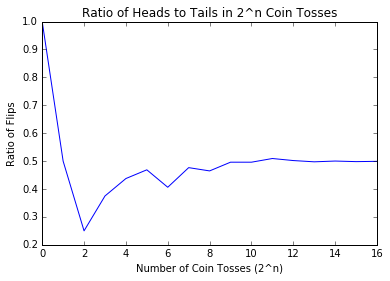

In [24]:
plt.plot(ratio_tosses(toss_coin_sim()))
plt.title("Ratio of Heads to Tails in 2^n Coin Tosses")
plt.xlabel("Number of Coin Tosses (2^n)")
plt.ylabel("Ratio of Flips")
plt.show()

#### Scatter Plot of Differences with a Logarithmic Scale

In [50]:
two_pow_n = [2**n for n in range(17)]

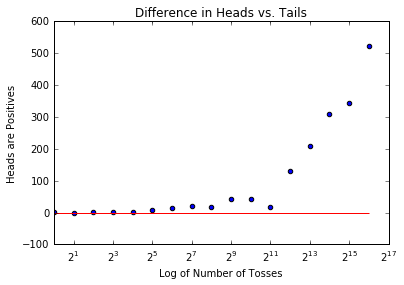

In [52]:
plt.scatter(two_pow_n, diff_tosses(toss_coin_sim()))
plt.xscale('log', basex=2)
plt.xlim(-10,)
plt.title('Difference in Heads vs. Tails')
plt.ylabel('Heads are Positives')
plt.xlabel('Log of Number of Tosses')
plt.hlines(0, 0, 2**16, color='red')
plt.show()

#### Scatter Plot of Ratios with a Logarithmic Scale

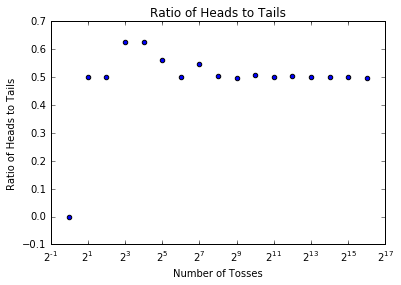

In [36]:
plt.scatter(two_pow_n, ratio_tosses(toss_coin_sim()))
plt.title("Ratio of Heads to Tails")
plt.xlabel("Number of Tosses")
plt.ylabel("Ratio of Heads to Tails")
plt.xscale('log', basex=2)
plt.show()

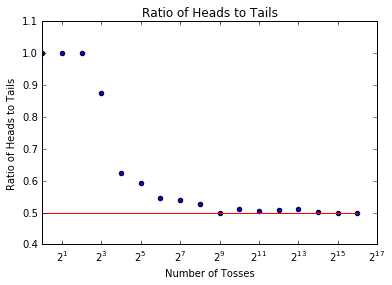

In [37]:
plt.scatter(two_pow_n, ratio_tosses(toss_coin_sim()))
plt.title('Ratio of Heads to Tails')
plt.xlabel('Number of Tosses')
plt.ylabel("Ratio of Heads to Tails")
plt.xscale('log', basex=2)
plt.xlim(-10,)
plt.hlines(.5, xmin=0, xmax=two_pow_n[-1], color='red')
plt.show()

### Twenty Trials - Mean & Standard Dev

In [39]:
def twenty_trials():

    return [ratio_tosses(toss_coin_sim()) for x in range(20)]

In [40]:
def mean_tosses():
    
    return [st.mean(x) for x in list(zip(*twenty_trials()))]

In [41]:
print(mean_tosses())

[0.4, 0.45, 0.5375, 0.53125, 0.484375, 0.4984375, 0.51015625, 0.487890625, 0.4890625, 0.4955078125, 0.4955078125, 0.4976318359375, 0.4998291015625, 0.499420166015625, 0.4989837646484375, 0.49955291748046876, 0.49990158081054686]


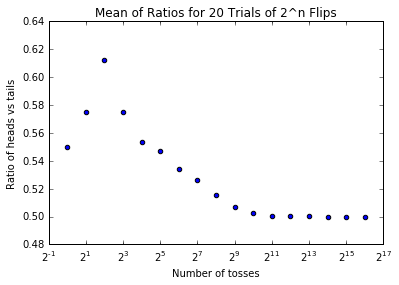

In [58]:
plt.scatter(two_pow_n, mean_tosses())
plt.xlabel('Number of tosses')
plt.ylabel('Mean of Ratios for 20 Trials')
plt.title('Mean of Ratios for 20 Trials of 2^n Flips')
plt.xscale('log', basex=2)
plt.ylabel('Ratio of heads vs tails')
plt.show()

In [59]:
def stddev_tosses():
    
    return [st.stdev(x) for x in list(zip(*twenty_trials()))]
 

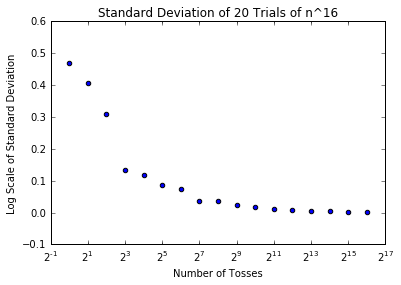

In [61]:
plt.scatter(two_pow_n, stddev_tosses())
# plt.yscale('log')
plt.xscale('log', basex=2)
plt.title("Standard Deviation of 20 Trials of n^16")
plt.xlabel("Number of Tosses")
plt.ylabel("Log Scale of Standard Deviation")
plt.show()